In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

from tensorflow.keras.models import load_model

In [2]:
data_test = pd.read_csv('test.csv')

In [3]:
X = np.array(data_test).reshape(-1, 28, 28, 1)
X = X/255

In [4]:
cnn = load_model(filepath='mnist_cnn_0.9955.h5')
print(cnn.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 64)        1664      
_________________________________________________________________
activation (Activation)      (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 64)        102464    
_________________________________________________________________
activation_1 (Activation)    (None, 20, 20, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          3

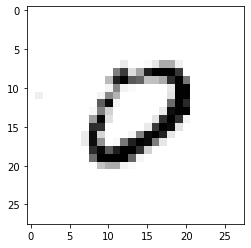

In [9]:
k = 3

plt.imshow(X[k, :, :, 0], cmap='Greys')

In [10]:
print('Prediction: ', np.argmax(cnn.predict(X[k:k+1])))

Prediction:  9


In [11]:
y = cnn.predict(X)

In [17]:
y_idx = np.argmax(y, axis=1)

In [21]:
df = pd.DataFrame({'ImageId': list(range(1,len(y_idx)+1)), 'Label': y_idx})

In [22]:
df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [24]:
df.to_csv('submission.csv', index=False)